In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("Mall_customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_processed=Sc.fit_transform(X)

In [7]:
# Clustering using Affinity Propagation 
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
Af=AffinityPropagation(preference=-30,random_state=42).fit(X_processed)


In [8]:
Af.cluster_centers_indices_

array([ 24,  25,  77, 175, 176])

In [9]:
y=Af.predict(X_processed)

In [10]:
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [11]:
labels=Af.labels_

In [12]:
# Metrics for clustering
cluster_centers_indices=Af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
print("estimated no of clusters: %d"% n_clusters)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_processed, y, metric="sqeuclidean")
)

estimated no of clusters: 5
Silhouette Coefficient: 0.743


In [17]:
# inversing the preprocessed input to the original data
X_inv=Sc.inverse_transform(X_processed)
X_inv

array([[ 15.,  39.],
       [ 15.,  81.],
       [ 16.,   6.],
       [ 16.,  77.],
       [ 17.,  40.],
       [ 17.,  76.],
       [ 18.,   6.],
       [ 18.,  94.],
       [ 19.,   3.],
       [ 19.,  72.],
       [ 19.,  14.],
       [ 19.,  99.],
       [ 20.,  15.],
       [ 20.,  77.],
       [ 20.,  13.],
       [ 20.,  79.],
       [ 21.,  35.],
       [ 21.,  66.],
       [ 23.,  29.],
       [ 23.,  98.],
       [ 24.,  35.],
       [ 24.,  73.],
       [ 25.,   5.],
       [ 25.,  73.],
       [ 28.,  14.],
       [ 28.,  82.],
       [ 28.,  32.],
       [ 28.,  61.],
       [ 29.,  31.],
       [ 29.,  87.],
       [ 30.,   4.],
       [ 30.,  73.],
       [ 33.,   4.],
       [ 33.,  92.],
       [ 33.,  14.],
       [ 33.,  81.],
       [ 34.,  17.],
       [ 34.,  73.],
       [ 37.,  26.],
       [ 37.,  75.],
       [ 38.,  35.],
       [ 38.,  92.],
       [ 39.,  36.],
       [ 39.,  61.],
       [ 39.,  28.],
       [ 39.,  65.],
       [ 40.,  55.],
       [ 40.,

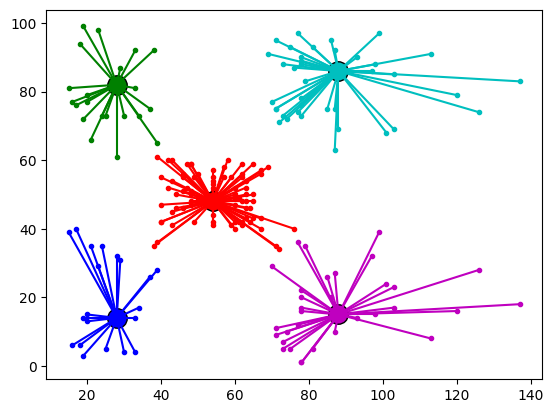

In [27]:
# to plot the graph for affinity propagation

from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# range is given as n_clusters i.e no of clusters available for our data here 5 is set as  range
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_inv[cluster_centers_indices[k]]
    plt.plot(X_inv[class_members, 0], X_inv[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_inv[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()


In [19]:
supervised=pd.DataFrame(dataset)

In [20]:
supervised["Cluster_group"]=y

In [21]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


C:\Users\Inst_\anaconda3\envs\aiml1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


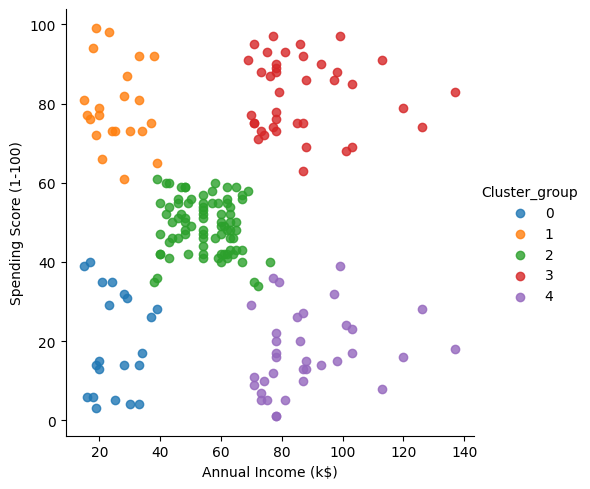

In [22]:
# plot graph for the cluster groups
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False, legend=True, legend_out=True)
